In [66]:
%matplotlib inline

import pandas as pd
import numpy as np
import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, qratio, maxDistMaxDoms, firsthitouter
import matplotlib.pyplot as plt

savedir = '../plots/ballooncuts/'


In [3]:
# Load the data
loader = Loader(C.basesel)
dt = loader.getData()
nue = loader.getNuE()

# Add some useful vars
def addvars(data):
    data['qratio'] = pd.Series( qratio(data), index = data.index)
    data['firsthit'] = pd.Series( firsthitouter(data), index = data.index)
    data['maxDist'] = maxDistMaxDoms(data)
    return data

dt = addvars(dt)
nue= addvars(nue)
    
#
## Now place some additional selection
#

# q-ratio -- outer events
dt = dt[ dt['qratio'] >= 0.8 ]
nue = nue[ nue['qratio'] >= 0.8 ]

# First hit outer
dt = dt[ dt['firsthit'] ]
nue = nue[ nue['firsthit'] ]

In [4]:
# Just peal of the pev values
nue_pev = nue[ np.log10(nue['PrimaryNeutrinoEnergy']) >= 6. ]

In [50]:
# Add on the full L3 selection
def L3(data):
    data = data[ data['ImpLF_rchi2'] > 80 ]
    return data[ data['tlarge5[0]-tearly5[0]'] < 200 ]

dt_L3 = L3(dt)
nue_pev_L3 = L3(nue_pev)

In [76]:
# For convenience
info = {'data' : [dt_L3, nue_pev_L3],
        'lbl'  : ['Data',r'Astro. $\nu_{e}$ (E>PeV)'],
        'c'    : ['black','b'],
        'w'    : ['w','wE2'],
        'short' : ['dt','nue']
       }

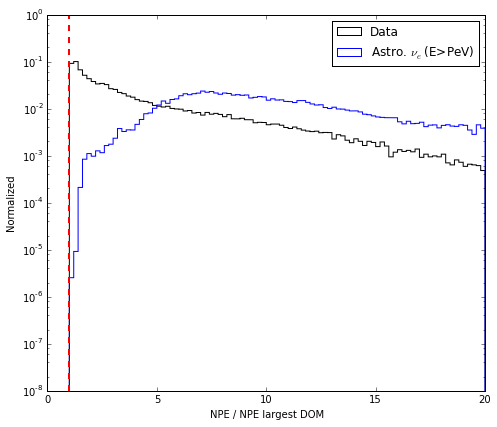

In [81]:
# Trying to characterize the balloon events
# First attempt: Just look at largest charge DOM

fig, ax = plt.subplots(ncols=1,figsize=(7,6))
for i in range(len(info['data'])):
    d = info['data'][i]
    l = info['lbl'][i]
    c = info['c'][i]
    w = info['w'][i]
    
    plt.hist(np.power(10,d['log10(hs_q_tot_pulses)'].as_matrix())/d['Qlarge5[0]'].as_matrix(),
            weights = d[w].as_matrix()/sum(d[w]),
            color = c,
            label = l,
            histtype='step',
            bins=100,
            range=(0,20))
    ax.set_yscale('log')
    plt.grid()
    plt.legend(loc='best')
    plt.ylabel('Normalized')
    plt.xlabel('NPE / NPE largest DOM')
plt.plot([1,1],[1e-8,1],lw=2,c='r',ls='dashed')
plt.tight_layout()
plt.savefig(savedir+'NPE_NPElarge_1D.png')

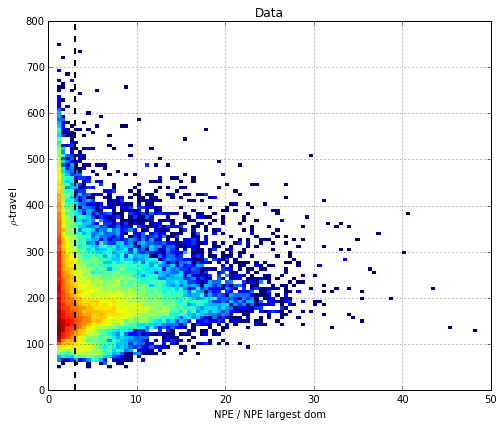

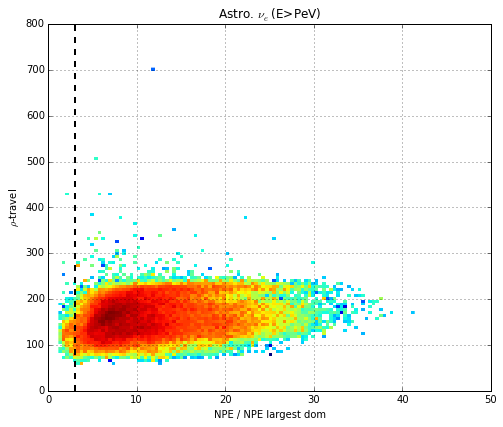

In [84]:
# Trying to characterize the balloon events
# First attempt: Just look at largest charge DOM
pt = PlotTool()

for i in range(len(info['data'])):
    fig, ax = plt.subplots(ncols=1,figsize=(7,6))

    d = info['data'][i]
    l = info['lbl'][i]
    c = info['c'][i]
    w = info['w'][i]
    s = info['short'][i]
    
    plt.title(l)
    plt.grid()
    plt.tight_layout()
    
    x = np.power(10,d['log10(hs_q_tot_pulses)'].as_matrix())/d['Qlarge5[0]'].as_matrix()
    y = d['rho_travel'].as_matrix()

    pt.ploth2(x,y,d[w].as_matrix(),'NPE / NPE largest dom',
             r'$\rho$-travel','Normalized',100,
             0,50,0,800,-1,-1, False)

    plt.plot([3,3],[0,800],c='black',lw=2,ls='dashed')
    plt.savefig(savedir+'NPE_NPElarge_vs_rho_travel_'+s+'_wcut.png')



In [55]:
dt_cut = dt_L3[ np.power(10,dt_L3['log10(hs_q_tot_pulses)'])/dt_L3['Qlarge5[0]'] > 3 ]
nue_cut = nue_pev_L3[ np.power(10,nue_pev_L3['log10(hs_q_tot_pulses)'])/nue_pev_L3['Qlarge5[0]'] > 3 ]

0.00893898494614
0.5165268438


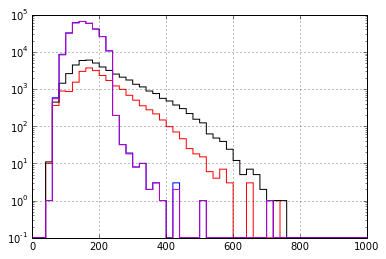

In [87]:
dt_cut['rho_travel'].hist(bins=50,range=(0,1000),
                          log=True,color='r',histtype='step')
dt_L3['rho_travel'].hist(bins=50,range=(0,1000),
                         log=True,color='black',histtype='step')
nue_pev_L3['rho_travel'].hist(bins=50,range=(0,1000),
                              log=True,color='b',histtype='step')
nue_cut['rho_travel'].hist(bins=50,range=(0,1000),
                           log=True,color='m',histtype='step')

print 1 - sum(nue_cut['wE2'])/sum(nue_pev_L3['wE2'])
print 1 - sum(dt_cut['w'])/sum(dt_L3['w'])
